# Question

For each airline find an airport where it has the highest average departure delay. Output an airline name, a name of the airport that has the highest average delay, and the value of that average delay.

# Query

```sql
with avgdelay as (
    select 
        dot_id_reporting_airline,
        originAirportID,
        avg(DepDelayMinutes) as avg_departure_delay
    from al_perf
    group by dot_id_reporting_airline, originAirportID
),

max_delay_airline as (
    select 
        dot_id_reporting_airline,
        max(avg_departure_delay) as max_delay_dep
    from avgdelay
    group by dot_id_reporting_airline
)

select
    L_AIRLINE_ID.Name as airline_name,
    L_AIRPORT_ID.Name as airport_name,
    avgdelay.avg_departure_delay
from avgdelay
join max_delay_airline
    on avgdelay.dot_id_reporting_airline = max_delay_airline.dot_id_reporting_airline
    and avgdelay.avg_departure_delay = max_delay_airline.max_delay_dep
join L_AIRLINE_ID
    on avgdelay.dot_id_reporting_airline = L_AIRLINE_ID.ID
join L_AIRPORT_ID
    on avgdelay.originAirportID = L_AIRPORT_ID.ID
order by airline_name;
```

# Result

15 rows returned.

# Visualization

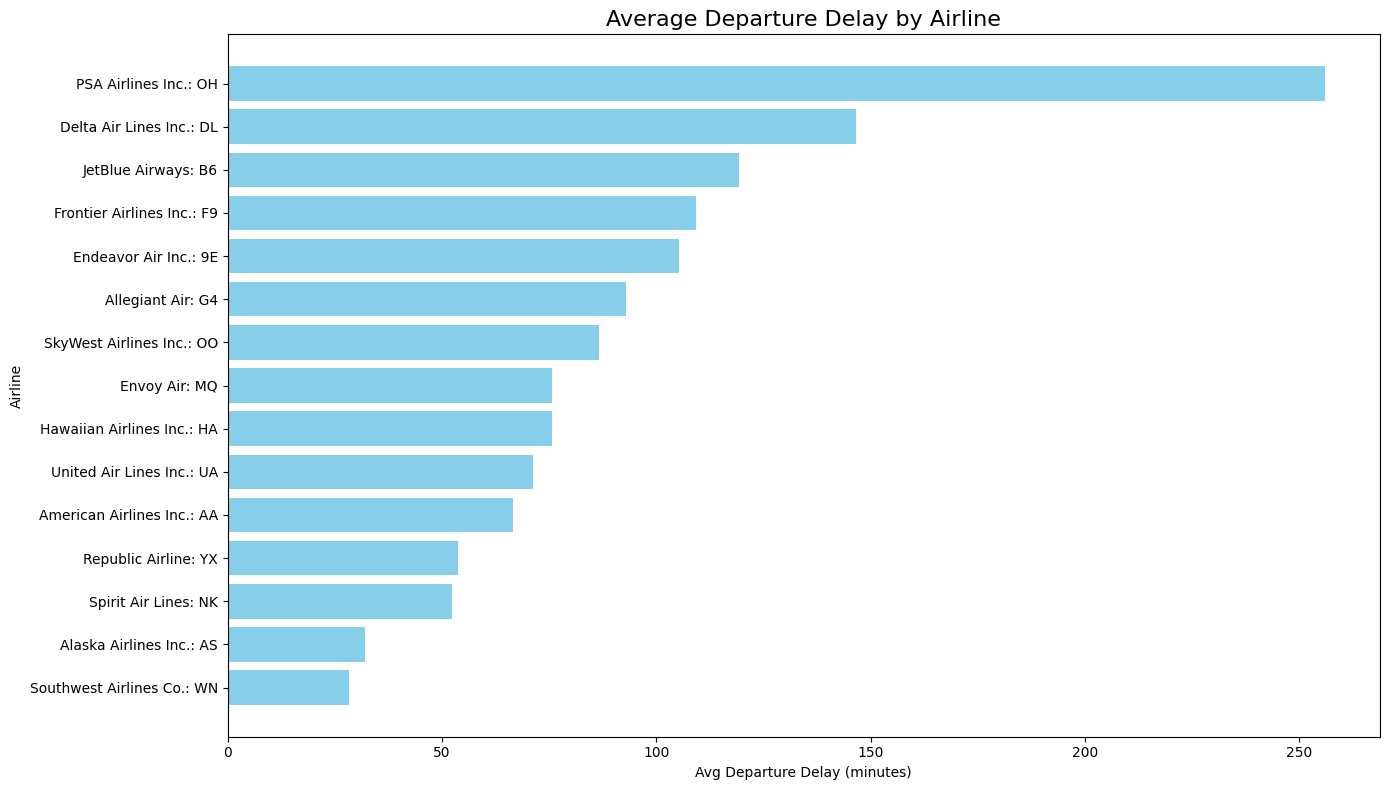

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../csv/Q5.csv")

# Average delay per airline
company_avg_delay = df.groupby('airline_name')['avg_departure_delay'].mean().sort_values()

plt.figure(figsize=(14,8))
plt.barh(company_avg_delay.index, company_avg_delay.values, color='skyblue')
plt.title("Average Departure Delay by Airline", fontsize=16)
plt.xlabel("Avg Departure Delay (minutes)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()




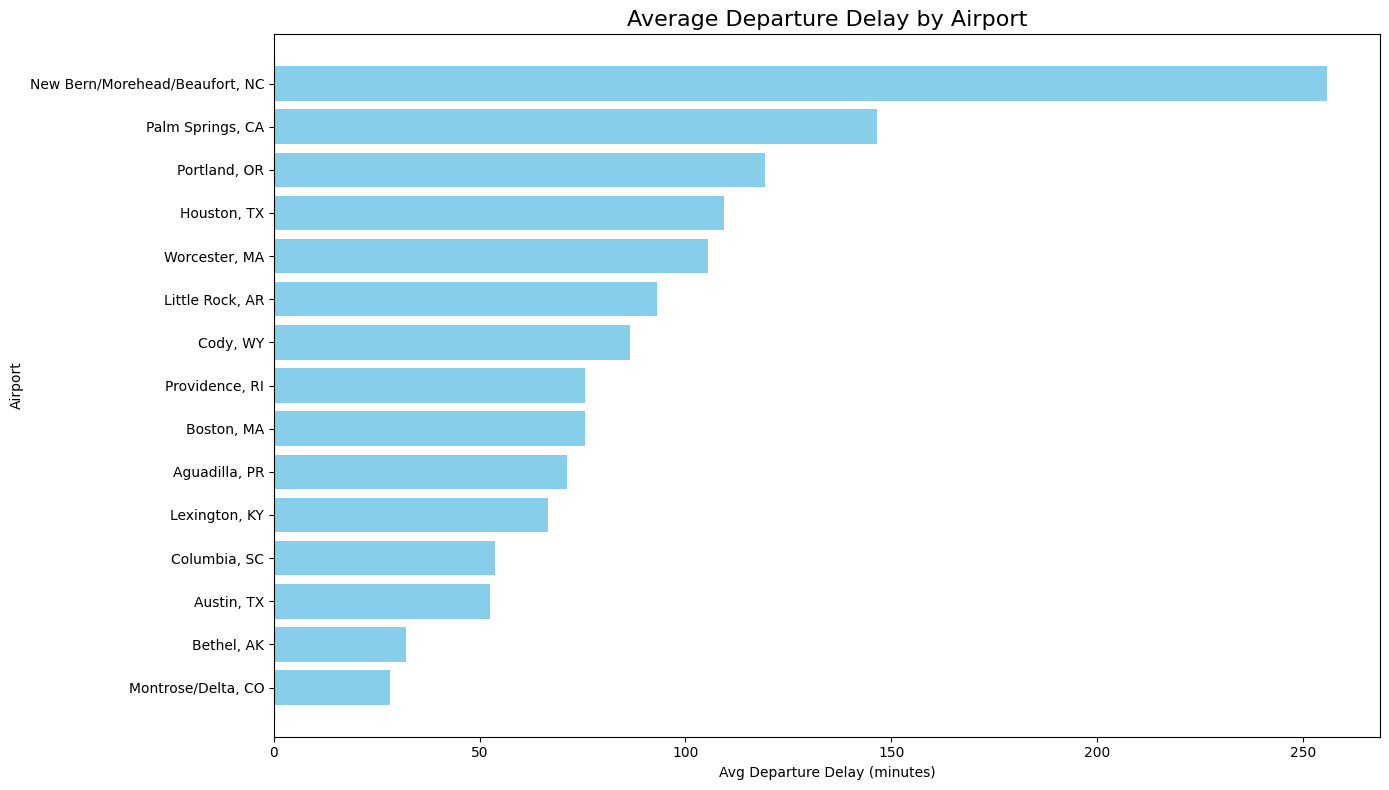

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../csv/Q5.csv")
df['airport_name_short'] = df['airport_name'].apply(lambda x: x.split(':')[0])

# Average delay per airport
airport_avg_delay = df.groupby('airport_name_short')['avg_departure_delay'].mean().sort_values()


plt.figure(figsize=(14,8))
plt.barh(airport_avg_delay.index, airport_avg_delay.values, color='skyblue')

plt.title("Average Departure Delay by Airport", fontsize=16)
plt.xlabel("Avg Departure Delay (minutes)")
plt.ylabel("Airport")
plt.tight_layout()


plt.show()

